## Bankruptcy Prevention

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

### 2. Read the Data

In [2]:
data_1 = pd.read_csv("bankruptcy-prevention.csv")
data_1

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


### 3. EDA (Understanding and Cleaning the Data)

In [3]:
# To seperate the columns
data = pd.read_csv("bankruptcy-prevention.csv",sep=';')
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
data.shape

(250, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [8]:
data.rename(columns = {'industrial_risk':'industrial_risk',' management_risk':'management_risk',' financial_flexibility':'financial_flexibility',' credibility':'credibility',' competitiveness':'competitiveness',' operating_risk':'operating_risk',' class':'class'},inplace='True')                    

In [9]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [10]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [11]:
# checking for duplicates
data.duplicated().any()

True

In [12]:
data.duplicated().sum()

147

In [13]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [14]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [15]:
# To find uniqueness in class
data['class'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [16]:
# About class details
data['class'].describe()

count                250
unique                 2
top       non-bankruptcy
freq                 143
Name: class, dtype: object

In [17]:
data_obj = {'industrial_risk': object, 'management_risk': object,'financial_flexibility': object, 'credibility': object,'competitiveness': object, 'operating_risk': object,'class':object}
data = data.astype(data_obj)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   industrial_risk        250 non-null    object
 1   management_risk        250 non-null    object
 2   financial_flexibility  250 non-null    object
 3   credibility            250 non-null    object
 4   competitiveness        250 non-null    object
 5   operating_risk         250 non-null    object
 6   class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'class' column
data['class'] = label_encoder.fit_transform(data['class'])

# Display the updated DataFrame
data


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [20]:
data.to_csv('data_encoded.csv', index=False)

#### 3.1 Data Visualization

<Figure size 600x400 with 0 Axes>

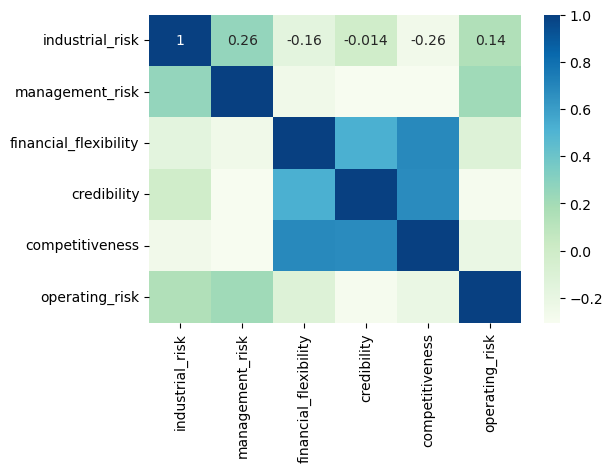

In [26]:
# To visualize the corelation 
plt.figure(figsize=(6,4))
# Convert to numeric, forcing invalid parsing to NaN
data[['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']] = data[['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']].apply(pd.to_numeric, errors='coerce')
# To visualize the correlation
# Drop rows with NaN values in the selected columns
data_cleaned = data[['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']].dropna()

plt.figure(figsize=(6, 4))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='GnBu')
plt.show()


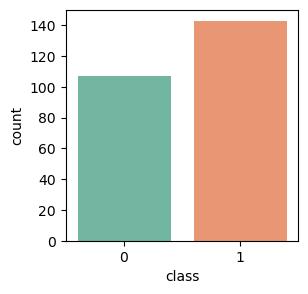

1    143
0    107
Name: class, dtype: int64


In [27]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'class',palette = 'Set2', data = data)
plt.show()
print(data['class'].value_counts())

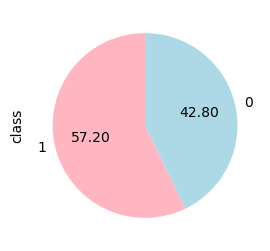

In [28]:
plt.figure(figsize=(3,3))
pastel_colors = ['lightpink', 'lightblue']
data['class'].value_counts().plot(kind='pie', autopct="%.2f", startangle = 90,colors=pastel_colors)
plt.show();

C:\Users\Abhi\AppData\Local\Temp\ipykernel_18888\3135154443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['class'])


<Axes: xlabel='class', ylabel='Density'>

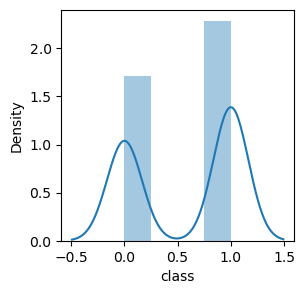

In [30]:
# Distribution plot of class_bankruptcy
plt.figure(figsize=(3,3))
sns.distplot(data['class'])

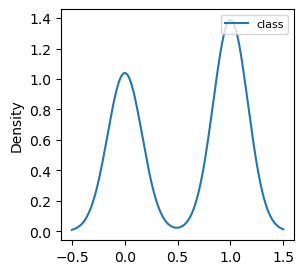

In [31]:
# Density Plot for credibility and class_bankruptcy
data.plot(kind='density',x='credibility',y='class',figsize=(3,3))
plt.legend(loc='upper right',prop={'size': 8})

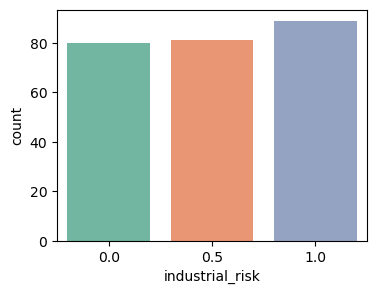

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64


In [32]:
# Industrial Risk
plt.figure(figsize=(4,3))
sns.countplot(x = 'industrial_risk', palette = 'Set2', data = data)
plt.show()
print(data['industrial_risk'].value_counts())

<Axes: xlabel='industrial_risk'>

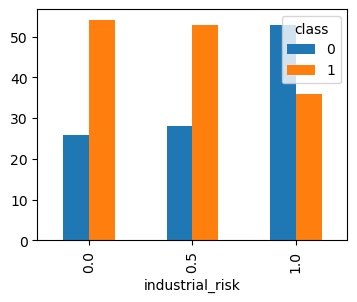

In [33]:
pd.crosstab(data['industrial_risk'], data['class']).plot(kind = 'bar',figsize=(4,3))

<Axes: xlabel='financial_flexibility'>

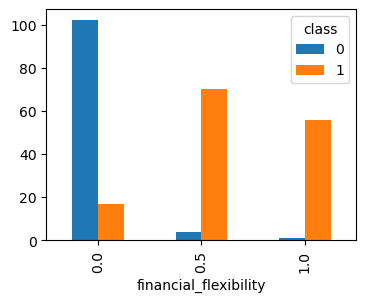

In [37]:
pd.crosstab(data['financial_flexibility'], data['class']).plot(kind = 'bar',figsize=(4,3))

<Axes: xlabel='class'>

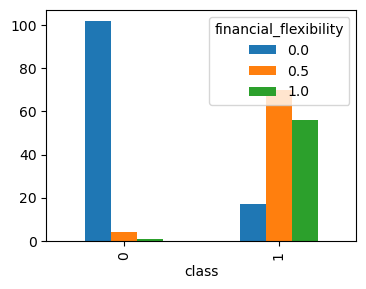

In [42]:
pd.crosstab(data["class"], data.financial_flexibility).plot(kind='bar',figsize=(4,3))

<Axes: xlabel='class'>

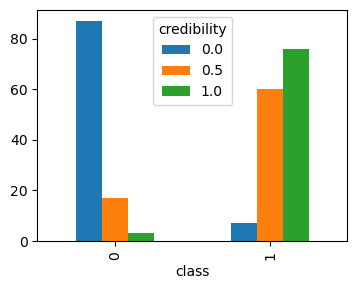

In [45]:
pd.crosstab(data["class"], data.credibility).plot(kind='bar',figsize=(4,3))

<Axes: xlabel='class'>

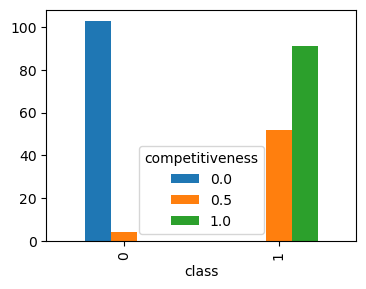

In [48]:
pd.crosstab(data["class"], data.competitiveness).plot(kind='bar',figsize=(4,3))

<Axes: xlabel='class'>

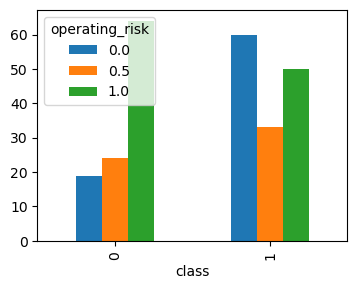

In [50]:
pd.crosstab(data["class"], data.operating_risk).plot(kind='bar',figsize=(4,3))

In [52]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

# Feature Engineering

In [53]:
import ppscore as pps

In [ ]:
!pip install ppscore

In [54]:

#pps.score(data, "feature_column", "target_column")  syntax
pps.score(data, "industrial_risk", "class")

{'x': 'industrial_risk',
 'y': 'class',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.428,
 'model_score': 0.4637022624855146,
 'model': DecisionTreeRegressor()}

In [55]:
#calculate the whole PPS matrix
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
1,industrial_risk,management_risk,0.108761,regression,True,mean absolute error,0.362,0.322629,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.000000,regression,True,mean absolute error,0.352,0.352440,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.346,0.361087,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.015113,regression,True,mean absolute error,0.388,0.382136,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000000,regression,True,mean absolute error,0.386,0.387298,DecisionTreeRegressor()
6,industrial_risk,class,0.000000,regression,True,mean absolute error,0.428,0.463702,DecisionTreeRegressor()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.338,0.348953,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
9,management_risk,financial_flexibility,0.042517,regression,True,mean absolute error,0.352,0.337034,DecisionTreeRegressor()


In [56]:
datapps=[['industrial_risk','class',0.000000],['management_risk','class',0.010108],['financial_flexibility','class',0.634376],['credibility','class',0.572262],['competitiveness','class',0.928592],['operating_risk','class',0.000000]]

In [57]:
PPS_Score=pd.DataFrame(datapps, columns=['Feature Column', 'Target Column','PP_Score'])

In [58]:
PPS_Score

,Feature Column,Target Column,PP_Score
0,industrial_risk,class,0.000000
1,management_risk,class,0.010108
2,financial_flexibility,class,0.634376
3,credibility,class,0.572262
4,competitiveness,class,0.928592
5,operating_risk,class,0.000000


# 'Competitiveness'feature has higher PPS, which means it is very usefull in predicting target class
# Whereas, industrial_risk' and 'operating_risk' features has 0 PPS which means it is not usefull in predicting target class

# Univariate Feature Selection

In [59]:

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
#names = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']
df2 = data.copy()
array_1 = df2.values

In [60]:
array_1

array([[0.5, 1. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 1. , 0. , ..., 0. , 1. , 0. ],
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0. , 1. , 1. , ..., 0.5, 0. , 1. ],
       [1. , 0. , 0.5, ..., 0.5, 0. , 1. ],
       [1. , 0. , 0.5, ..., 1. , 1. , 1. ]])

In [61]:
X1 = array_1[:,0:6]
Y = array_1[:,6]
import numpy as np

# Ensure Y is a numpy array
Y = np.array(Y, dtype=np.int64)  # or dtype=np.float64 if the labels are floats

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X1, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X1)

#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

[ 4.225  9.407 60.237 52.307 82.186  6.458]


In [62]:
data1=[['industrial_risk',4.292],['management_risk',10.115],['financial_flexibility',61.986],['credibility',52.478],['competitiveness',80.434],['operating_risk',6.375]]

In [63]:
UFS_Score=pd.DataFrame(data1, columns=['Feature','UFS_Score'])

In [64]:

UFS_Score

,Feature,UFS_Score
0,industrial_risk,4.292
1,management_risk,10.115
2,financial_flexibility,61.986
3,credibility,52.478
4,competitiveness,80.434
5,operating_risk,6.375


# We can see here that, competitiveness has the heighest score and industrial_risk has the lowest score

# Outliers detection using Random forest 

In [65]:

from sklearn.ensemble import IsolationForest

In [66]:

df1=data.copy()

In [67]:

# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df1)

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=10)

In [68]:
# predictions
y_pred_outliers = clf.predict(df1)

In [69]:

#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [70]:
df1['scores']=clf.decision_function(df1)

In [71]:
df1['anomaly']=clf.predict(df1.iloc[:,0:7])

In [72]:
df1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1


In [73]:

#Print the outlier data points
df1[df1['anomaly']==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.000517,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-0.044748,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-0.002184,-1


In [74]:
import pandas as pd

# Assuming your DataFrame is named `data`

# List of row indices to drop
rows_to_drop = [27, 72, 192]

# Drop the rows from the DataFrame
data = data.drop(rows_to_drop)

# Reset the index of the DataFrame (optional)
data = data.reset_index(drop=True)

# Display the updated DataFrame
data


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1


In [75]:
import pandas as pd


# Separate the target variable 'class' into y
y = data['class']

# Drop the 'class' column to create X
X = data.drop(columns=['class'])

# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40)

# Model 1 - Decision Tree Classifier using Entropy Criteria

In [76]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

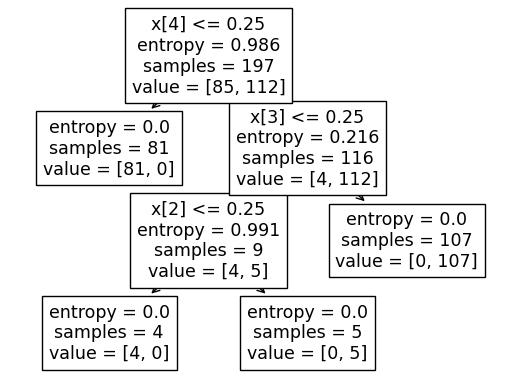

In [77]:
#PLot the decision tree
tree.plot_tree(model); # this will show index of the column to show name plot graph as in next line

In [78]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    30
0    20
dtype: int64

In [79]:
preds

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1])

In [80]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
class,,
0,20,0
1,0,30


In [81]:
# Accuracy --- calculate as (8+12+9)/(8+12+9+1)
np.mean(preds==y_test)

1.0

In [82]:
df_test={'industrial_risk':0.5,'management_risk':1.0,'financial_flexibility':0.0,'credibility':0.0,'competitiveness':0.0,'operating_risk':0.5 }

In [83]:

df_test1=pd.DataFrame(df_test,index=['1'])
#test_data_2=pd.DataFrame(test_data,index=['1','2'])

In [84]:
preds = model.predict(df_test1) # predicting on test data set 

In [85]:
preds

array([0])

In [86]:
df_test={'industrial_risk':[0.0,1.0,0.5],'management_risk':[0.0,1.0,0.0],'financial_flexibility':[0.5,0.5,0.0],'credibility':[0.5,0.5,0.5],'competitiveness':[0.5,0.5,0.0],'operating_risk':[0.0,1.0,1.0] }

In [87]:

df_test2=pd.DataFrame(df_test,index=['1','2','3'])
#test_data_2=pd.DataFrame(test_data,index=['1','2'])

In [88]:
preds = model.predict(df_test2) # predicting on test data set 

In [89]:

preds

array([1, 1, 0])

In [90]:
# CART Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,y)

0.9958333333333333


# Model 2 - Logistic Regression

In [91]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [92]:
# Predict for x_test dataset
y_pred = classifier.predict(x_test)
y_pred_prob = classifier.predict_proba(x_test)[:, 1]


In [93]:
# Create a DataFrame for predictions
y_pred_df = pd.DataFrame({
    'actual': y_test,
    'predicted_prob': y_pred_prob
})
print(y_pred_df)

     actual  predicted_prob
54        0        0.109402
169       1        0.944700
81        0        0.071382
18        0        0.029946
168       1        0.934307
11        0        0.035754
137       1        0.953532
236       1        0.990092
3         0        0.200205
221       1        0.984862
102       0        0.029946
46        0        0.025056
139       1        0.958660
29        0        0.029946
157       1        0.921715
97        0        0.034599
147       1        0.978986
208       1        0.968085
89        0        0.038027
201       1        0.986765
225       1        0.879721
172       1        0.846090
37        0        0.109402
214       1        0.826452
205       1        0.869122
203       1        0.994061
65        0        0.045329
125       1        0.949605
166       1        0.991783
164       1        0.994635
111       1        0.995536
228       1        0.907426
196       1        0.934307
200       1        0.961702
42        0        0

In [94]:
# Confusion Matrix for the model accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[20  0]
 [ 0 30]]


In [95]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        30

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



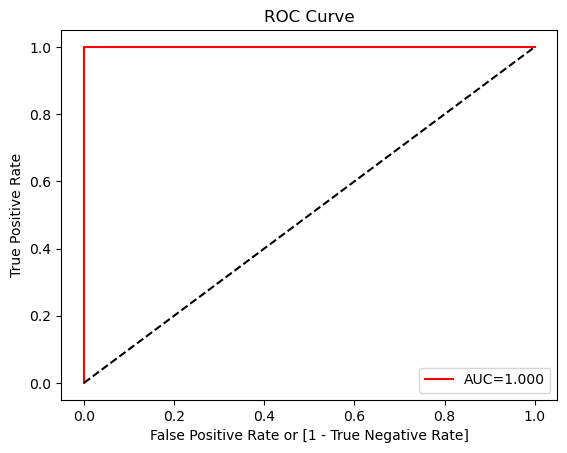

In [96]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.plot(fpr, tpr, color='red', label='AUC=%0.3f' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Model 3 - Bagged Decision Trees for Classification

In [97]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Setup cross-validation and Bagging Classifier
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
modelB = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

# Perform cross-validation on the training set
results = cross_val_score(model, x_train, y_train, cv=kfold)
print("Cross-Validation Mean Accuracy:", results.mean())

# Fit the model on the entire training data and make predictions
modelB.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Optional: Calculate and print additional metrics such as accuracy or confusion matrix on the test set
from sklearn.metrics import accuracy_score, confusion_matrix

print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Mean Accuracy: 0.99


C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Set Accuracy: 1.0
Confusion Matrix:
[[20  0]
 [ 0 30]]


# Model 4 - AdaBoost Classification

In [98]:
from pandas import read_csv
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Setup cross-validation and AdaBoost Classifier
num_trees = 10
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
modelAd = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

# Perform cross-validation on the training set
results = cross_val_score(model, x_train, y_train, cv=kfold)
print("Cross-Validation Mean Accuracy on Training Data:", results.mean())

# Fit the model on the entire training data
modelAd.fit(x_train, y_train)

# Make predictions on the test set
y_pred = modelAd.predict(x_test)

# Evaluate the model on the test set
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Mean Accuracy on Training Data: 0.99
Test Set Accuracy: 1.0
Confusion Matrix on Test Set:
[[20  0]
 [ 0 30]]


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input


# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Convert encoded labels to categorical format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Reshape input data for RNN (samples, timesteps, features)
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_test_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

# Define the RNN model
modelR = Sequential()
modelR.add(Input(shape=(1, x_train_reshaped.shape[2])))
modelR.add(SimpleRNN(50, activation='relu'))
modelR.add(Dense(50, activation='relu'))
modelR.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
modelR.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = modelR.fit(x_train_reshaped, y_train_categorical, epochs=50, batch_size=32, validation_data=(x_test_reshaped, y_test_categorical))

# Evaluate the model
loss, accuracy = modelR.evaluate(x_test_reshaped, y_test_categorical)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Example input data
new_data = pd.DataFrame({
    'industrial_risk': [0.5],  # Replace with actual values
    'management_risk': [0.3],
    'financial_flexibility': [0.4],
    'credibility': [0.6],
    'competitiveness': [0.5],
    'operating_risk': [0.2]
})



new_data_scaled = scaler.transform(new_data)

# Reshape input data for RNN (samples, timesteps, features)
new_data_reshaped = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Make prediction
prediction = modelR.predict(new_data_reshaped)

# Convert prediction to readable format (assuming multi-class classification)
predicted_class = np.argmax(prediction, axis=1)[0]

print(f'The predicted class is: {predicted_class}')

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - accuracy: 0.7369 - loss: 0.6145 - val_accuracy: 0.8400 - val_loss: 0.5108
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8112 - loss: 0.4992 - val_accuracy: 0.9400 - val_loss: 0.4146
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8970 - loss: 0.4023 - val_accuracy: 0.9600 - val_loss: 0.3330
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9664 - loss: 0.3311 - val_accuracy: 1.0000 - val_loss: 0.2650
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.2578 - val_accuracy: 1.0000 - val_loss: 0.2066
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.1904 - val_accuracy: 1.0000 - val_loss: 0.1571
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.1515 - val_accuracy: 1.0000 - val_loss: 0.1177
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1159 - val_accuracy: 1.0000 - val_loss: 0.0873

In [100]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/4

# Deployment 

In [102]:
import pickle
pickle.dump(model, open('FinalizedDc.pkl', 'wb'))


In [103]:
modelR.save('modelR.keras')


In [110]:
%%writefile appDc.py
import streamlit as st
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, classification_report

# Function to load the saved model and display results
def load_and_display_results(model, input_values):
    # Use the loaded model to make predictions
    input_data = pd.DataFrame([input_values])
    
    # Ensure column names match those used during training
    input_data = input_data[['industrial_risk', 'management_risk', 'financial_flexibility', 
                             'credibility', 'competitiveness', 'operating_risk']]

    y_pred = model.predict(input_data)

    return y_pred

# Streamlit UI
def main():
    st.title('Decision Tree Model Predictor')

    # Input values from the user
    st.subheader('Enter Values for Prediction:')
    industrial_risk = st.number_input('Industrial Risk', min_value=0.0, max_value=1.0, step=0.01, value=0.5)
    management_risk = st.number_input('Management Risk', min_value=0.0, max_value=1.0, step=0.01, value=0.5)
    financial_flexibility = st.number_input('Financial Flexibility', min_value=0.0, max_value=1.0, step=0.01, value=0.5)
    credibility = st.number_input('Credibility', min_value=0.0, max_value=1.0, step=0.01, value=0.5)
    competitiveness = st.number_input('Competitiveness', min_value=0.0, max_value=1.0, step=0.01, value=0.5)
    operating_risk = st.number_input('Operating Risk', min_value=0.0, max_value=1.0, step=0.01, value=0.5)

    # Prepare input data as a dictionary
    input_values = {
        'industrial_risk': industrial_risk,
        'management_risk': management_risk,
        'financial_flexibility': financial_flexibility,
        'credibility': credibility,
        'competitiveness': competitiveness,
        'operating_risk': operating_risk
    }

    # Load the trained model from pickle file
    model = pickle.load(open('FinalizedDc.pkl', 'rb'))
 # Predict and display results
    if st.button('Predict'):
        prediction = load_and_display_results(model, input_values)
        st.subheader('Prediction Result:')
        
        # Convert prediction to human-readable text
        if prediction[0] == 0:
            st.write("Predicted Class: Bankruptcy")
        else:
            st.write("Predicted Class: Non-Bankruptcy")

if __name__ == '__main__':
    main()



Overwriting appDc.py


In [ ]:
! streamlit run appDc.py

In [106]:
!pip install streamlit

In [108]:
!pip install --upgrade streamlit


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB 325.1 kB/s eta 0:00:27
   ---------------------------------------- 0.0/8.7 MB 326.8 kB/s eta 0:00:27
    --------------------------------------- 0.1/8.7 MB 726.2 kB/s eta 0:00:12
    --------------------------------------- 0.2/8.7 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.2/8.7 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.2/8.7 MB 1.1 MB/s eta 0:00:08
   - -------------------------------------- 0.2/8.7 MB 758.5 kB/s eta 0:00:12
   - -------------------------------------- 0.3/8.7 MB 863.3 kB/s eta 0:00:10
   - -------------------------------------- 0.4/8.7 MB 1.1 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.7 MB 1.2 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/8.7 MB 1.1 MB/s eta 0:00:08
   -- ----------